In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

#parameters
np.random.seed(42)  # reproducibility
n = 1000  # number of records

dates = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')
product_categories = ['Machinery', 'Tools', 'Electrical', 'Automotive']
regions = ['North', 'South', 'East', 'West']
customer_types = ['Corporate', 'Distributor', 'Retail']
sales_channels = ['Online', 'Offline']

#Dataset
df = pd.DataFrame({
    'Order_ID': np.arange(1001, 1001+n),
    'Date': np.random.choice(dates, n),
    'Product_Category': np.random.choice(product_categories, n),
    'Product_Name': np.random.choice([
        'Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt', 
        'Drill', 'Motor', 'Valve', 'Gearbox'
    ], n),
    'Region': np.random.choice(regions, n),
    'Customer_Type': np.random.choice(customer_types, n),
    'Units_Sold': np.random.randint(10, 200, n),
    'Unit_Price': np.random.randint(500, 5000, n),
    'Discount': np.random.uniform(0, 0.25, n),
    'Sales_Channel': np.random.choice(sales_channels, n)
})

# Calculate cols
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])
df['Profit'] = df['Total_Sales'] * np.random.uniform(0.05, 0.25, n)

df.head()

,Order_ID,Date,Product_Category,Product_Name,Region,Customer_Type,Units_Sold,Unit_Price,Discount,Sales_Channel,Total_Sales,Profit
0,1001,2024-05-10,Tools,Compressor,South,Corporate,141,1760,0.011516,Online,245302.247529,24212.722150
1,1002,2024-12-31,Tools,Drill,West,Corporate,102,4432,0.232706,Offline,346865.986341,81975.480237
2,1003,2024-11-10,Machinery,Pump,North,Distributor,132,3768,0.165200,Offline,415209.667624,29466.246532
3,1004,2022-05-02,Machinery,Valve,West,Corporate,82,1084,0.186591,Offline,72302.323985,7489.692905
4,1005,2023-04-12,Machinery,Gearbox,South,Distributor,164,3299,0.077893,Online,498893.118076,76848.957875


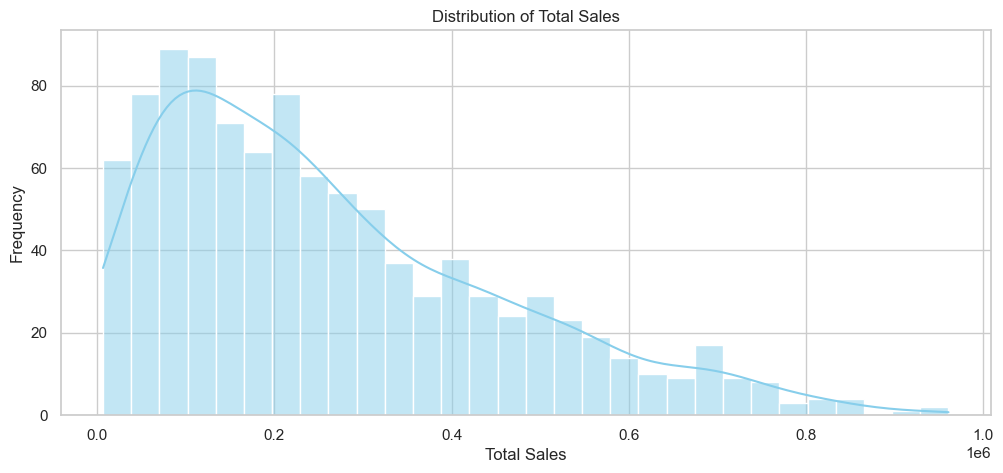

In [26]:
#univariate
#Total Sales
plt.figure(figsize=(12,5))
sns.histplot(df['Total_Sales'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

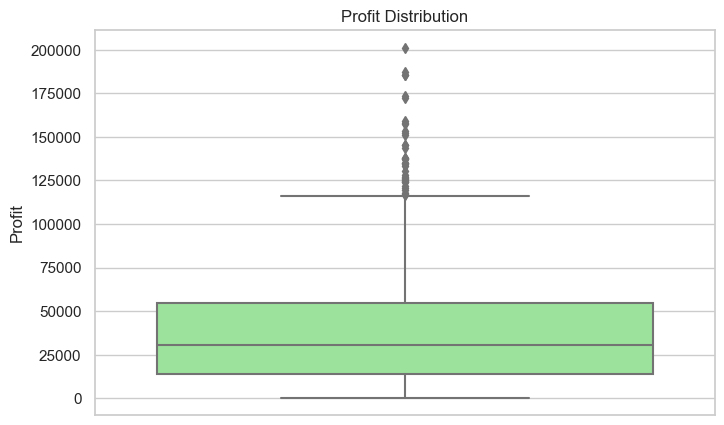

In [3]:
#Profit
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Profit'], color='lightgreen')
plt.title("Profit Distribution")
plt.ylabel("Profit")
plt.show()

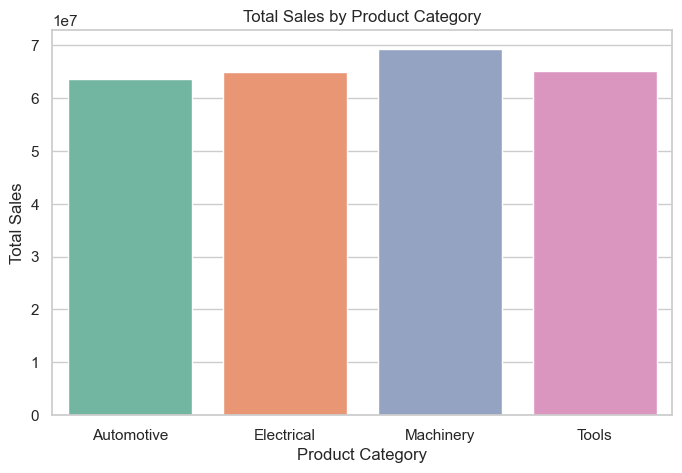

In [40]:
#Product Category
product_sales = df.groupby('Product_Category')['Total_Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Product_Category', y='Total_Sales', data=product_sales, palette='Set2')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

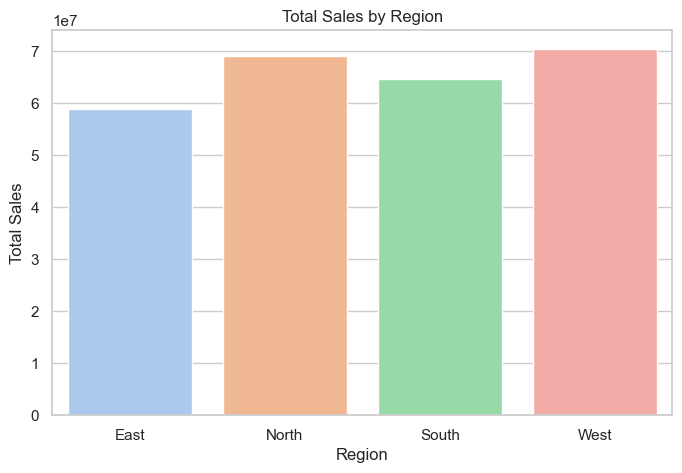

In [41]:
#Region
region_sales = df.groupby('Region')['Total_Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total_Sales', data=region_sales, palette='pastel')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

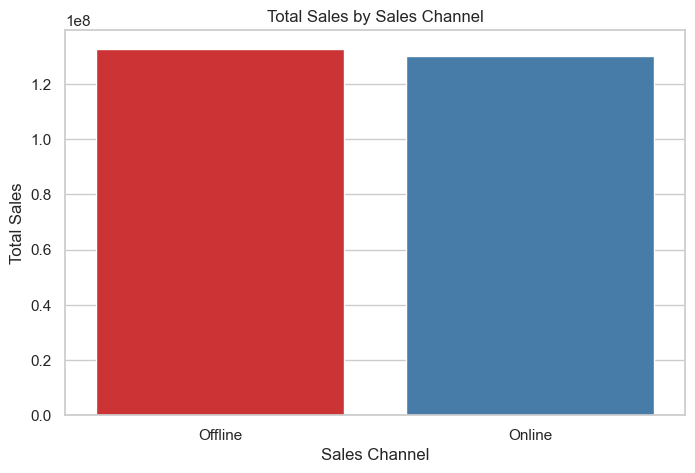

In [43]:
#Sales Channel
channel_sales = df.groupby('Sales_Channel')['Total_Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Sales_Channel', y='Total_Sales', data=channel_sales, palette='Set1')
plt.title("Total Sales by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Sales")
plt.show()

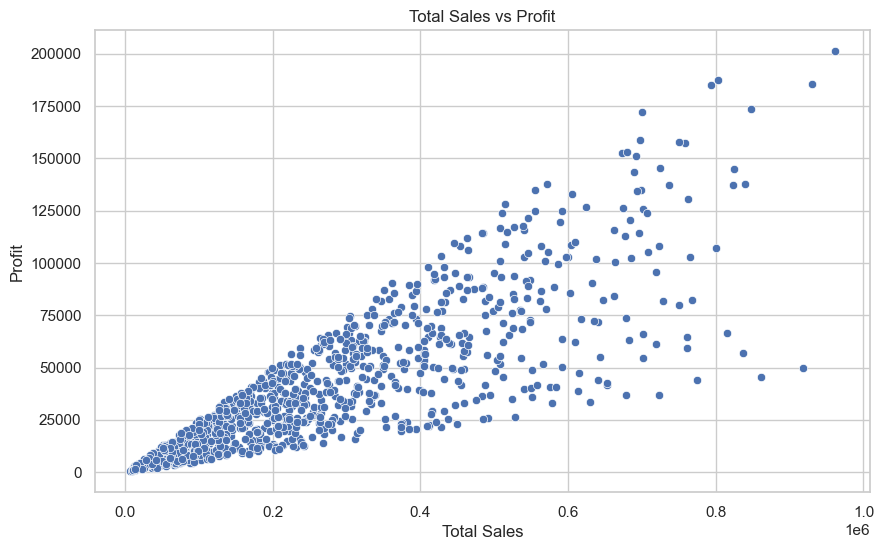

In [44]:
#Bivariate
#Total Sales vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total_Sales', y='Profit', data=df)
plt.title("Total Sales vs Profit")
plt.xlabel("Total Sales")
plt.ylabel("Profit")
plt.show()

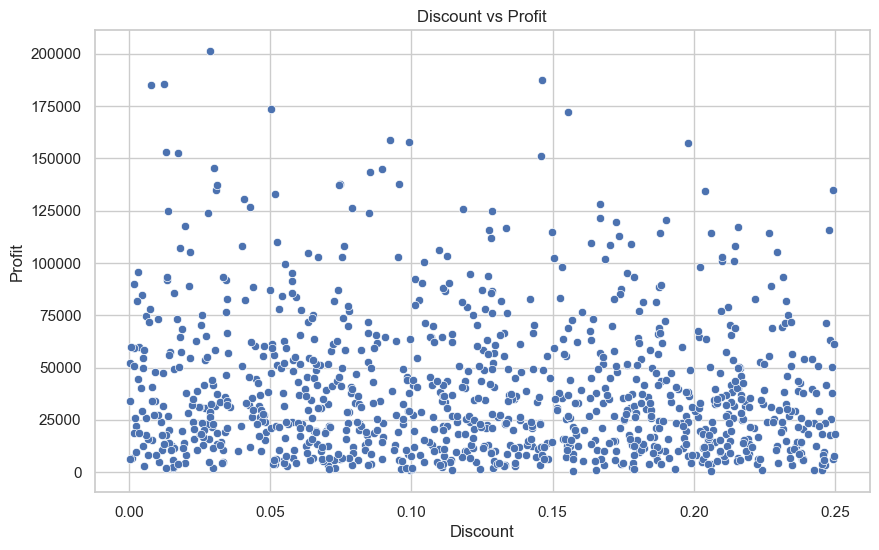

In [45]:
#Discount vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_2652\3602568645.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product_Category', y='Profit', data=df, palette='Set2', ci=None)


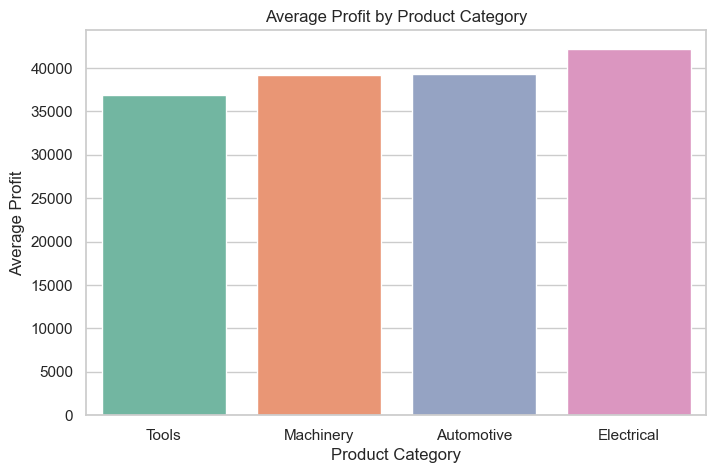

In [19]:
#Product Category vs Profit
plt.figure(figsize=(8,5))
sns.barplot(x='Product_Category', y='Profit', data=df, palette='Set2', ci=None)
plt.title("Average Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit")
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_2652\1825269036.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Total_Sales', data=df, palette='pastel', ci=None)


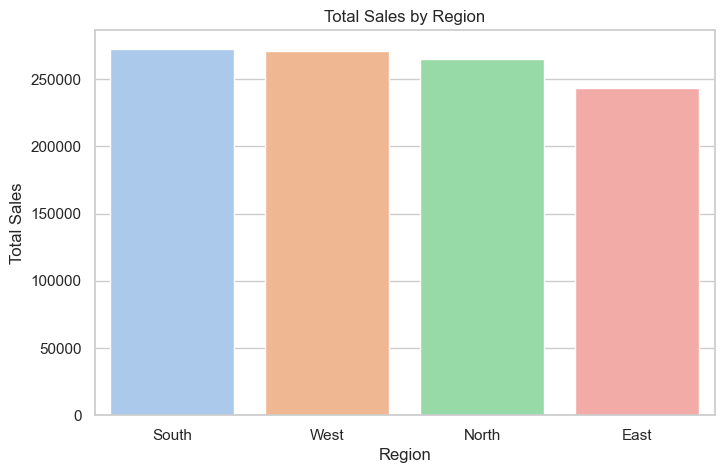

In [20]:
#Region vs Total Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total_Sales', data=df, palette='pastel', ci=None)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

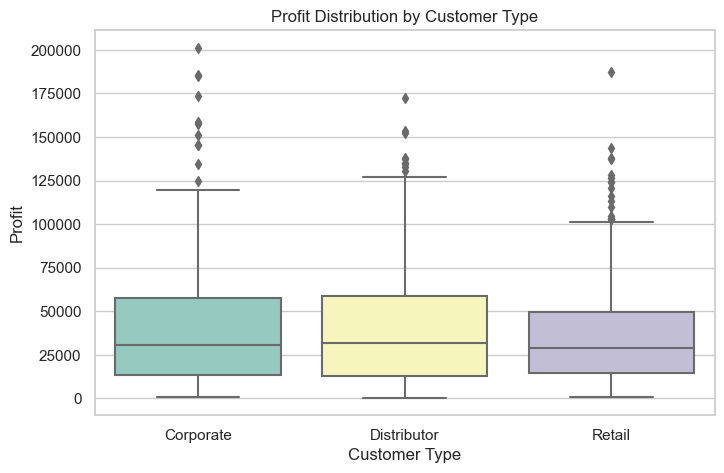

In [21]:
#Customer Type vs Profit
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer_Type', y='Profit', data=df, palette='Set3')
plt.title("Profit Distribution by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Profit")
plt.show()

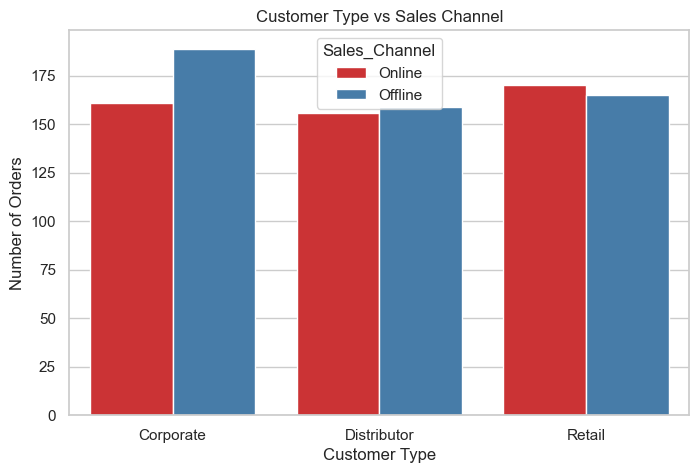

In [22]:
#Sales Channel vs Customer Type
plt.figure(figsize=(8,5))
sns.countplot(x='Customer_Type', hue='Sales_Channel', data=df, palette='Set1')
plt.title("Customer Type vs Sales Channel")
plt.xlabel("Customer Type")
plt.ylabel("Number of Orders")
plt.show()

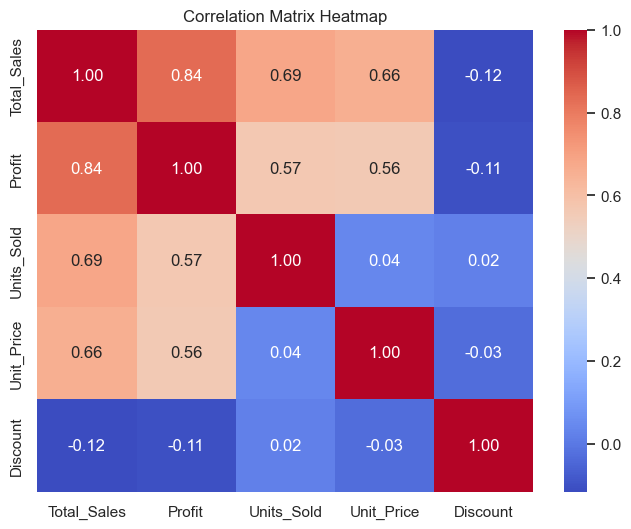

In [36]:
#Correlation Analysis
#Compute correlation matrix
corr = df[['Total_Sales', 'Profit', 'Units_Sold', 'Unit_Price', 'Discount']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

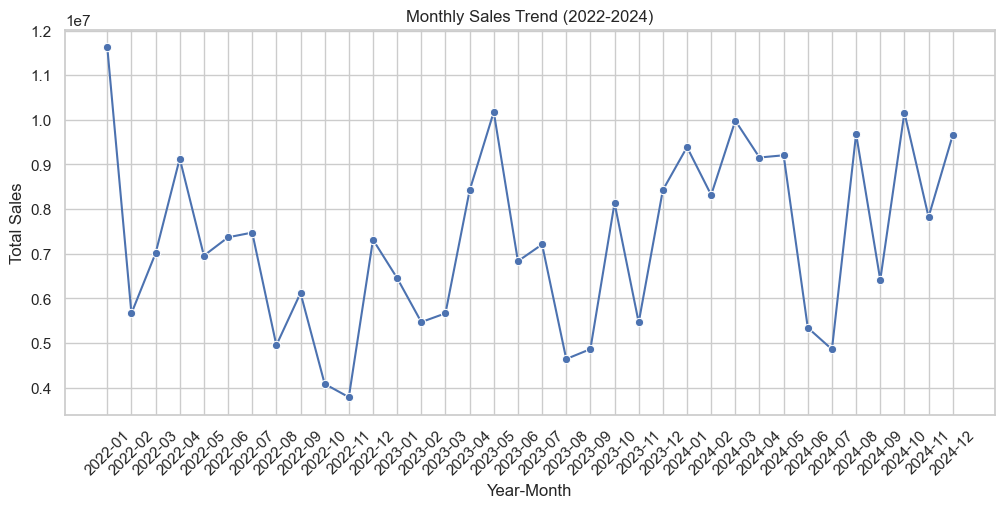

In [47]:
# Create YearMonth column (string) for grouping
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')  # YYYY-MM format

# Group by YearMonth and sum Total_Sales
monthly_sales = df.groupby('YearMonth')['Total_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x='YearMonth', y='Total_Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend (2022-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.show()

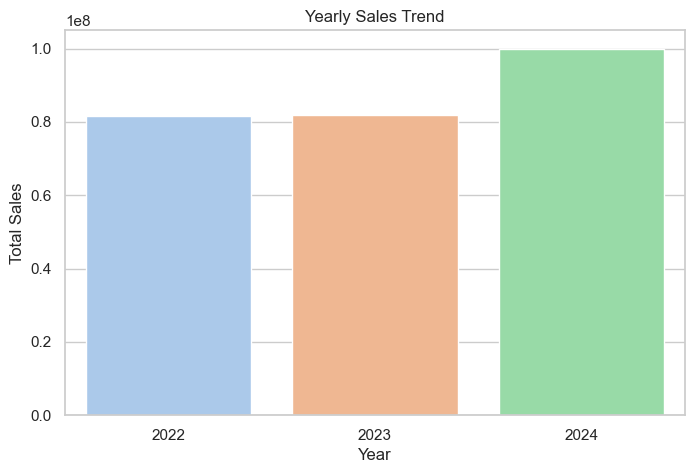

In [33]:
# Yearly Trend
yearly_sales = df.groupby('Year')['Total_Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Total_Sales', data=yearly_sales, palette='pastel')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

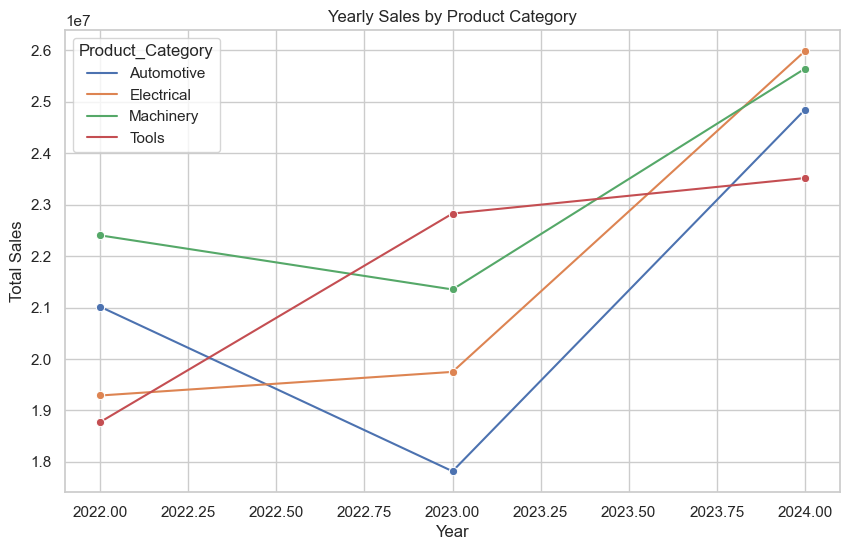

In [34]:
# Category Performance Over Time
category_sales = df.groupby(['Year', 'Product_Category'])['Total_Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Total_Sales', hue='Product_Category', data=category_sales, marker='o')
plt.title("Yearly Sales by Product Category")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

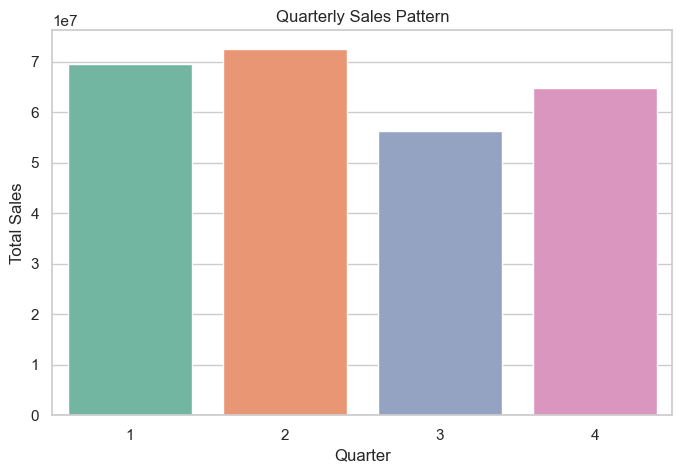

In [35]:
# Quarterly Pattern
quarter_sales = df.groupby('Quarter')['Total_Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Quarter', y='Total_Sales', data=quarter_sales, palette='Set2')
plt.title("Quarterly Sales Pattern")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()